In [1]:
# import ipython
import matplotlib.pyplot as plt
#import nbgrader
#import notebook
import numpy as np
import pandas as pd
#import sklearn
#import seaborn as sns
import time
#import pyarrow

from sklearn.svm import SVC

from sklearn.model_selection import train_test_split
from sklearn.ensemble import (
    RandomForestClassifier,
    GradientBoostingClassifier
)
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier

from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, precision_score, \
                            recall_score, f1_score, \
                            roc_auc_score, roc_curve, \
                            confusion_matrix
 
# import category-encoders
from matplotlib.pyplot import figure


In [2]:
test_df = pd.read_csv("data/test.csv")
test_df.set_index("id", inplace=True)


In [10]:
api_data = pd.read_csv('api_data_correct_ids.csv', index_col="ID")
train_df = pd.read_csv('all_data.csv', index_col="id")
train_df = train_df.join(api_data)
train_df = train_df.rename(str.lower, axis='columns')


In [11]:
train_df.isnull().sum()

numunderscore                           1
numnumericchars                        63
relativeformaction                     68
ipaddress                             192
atsymbol                                4
tildesymbol                            33
rightclickdisabled                    612
numhash                                 4
httpsinhostname                        65
subdomainlevel                          3
pathlevel                              22
randomstring                           32
numdashinhostname                     518
numpercent                              5
fakelinkinstatusbar                    33
querylength                            60
abnormalformaction                      0
domaininsubdomains                    202
hostnamelength                          5
embeddedbrandname                      72
domaininpaths                          70
extfavicon                             67
numdash                               215
numampersand                      

In [12]:
train_df.dropna()

,numunderscore,numnumericchars,relativeformaction,ipaddress,atsymbol,tildesymbol,rightclickdisabled,numhash,httpsinhostname,subdomainlevel,...,submitinfotoemail,iframeorframe,missingtitle,imagesonlyinform,subdomainlevelrt,urllengthrt,pctextresourceurlsrt,abnormalextformactionr,extmetascriptlinkrt,pctextnullselfredirecthyperlinksrt
id,,,,,,,,,,,,,,,,,,,,,
1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,1,1,0,0,1,0,0
4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,0,0,0,1,-1,0,1,0,0
5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,1,0,0,1,1,0,0,0,0
7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0,0,0,0,1,0,0,1,0,0
9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,...,0,0,0,0,-1,-1,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9982.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1,1,0,0,1,1,0,0,0,0
9988.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,1,0,1,0,0
9991.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0,0,0,0,1,1,0,1,0,0


In [4]:
from sklearn.impute import SimpleImputer
colnames = train_df.columns

imp_mean = SimpleImputer(missing_values=np.nan, strategy='median')
imp_mean.fit(train_df)
SimpleImputer()
train_df = pd.DataFrame(data=imp_mean.transform(train_df), columns=colnames)

In [5]:
#train_df['urllengthrt'] = train_df['urllengthrt'].replace(-1,np.NaN)
#train_df = train_df.dropna()

In [6]:
train_df.class_label.unique()

array([1., 0.])

In [7]:
train_df.dtypes

numunderscore                         float64
numnumericchars                       float64
relativeformaction                    float64
ipaddress                             float64
atsymbol                              float64
tildesymbol                           float64
rightclickdisabled                    float64
numhash                               float64
httpsinhostname                       float64
subdomainlevel                        float64
pathlevel                             float64
randomstring                          float64
numdashinhostname                     float64
numpercent                            float64
fakelinkinstatusbar                   float64
querylength                           float64
abnormalformaction                    float64
domaininsubdomains                    float64
hostnamelength                        float64
embeddedbrandname                     float64
domaininpaths                         float64
extfavicon                        

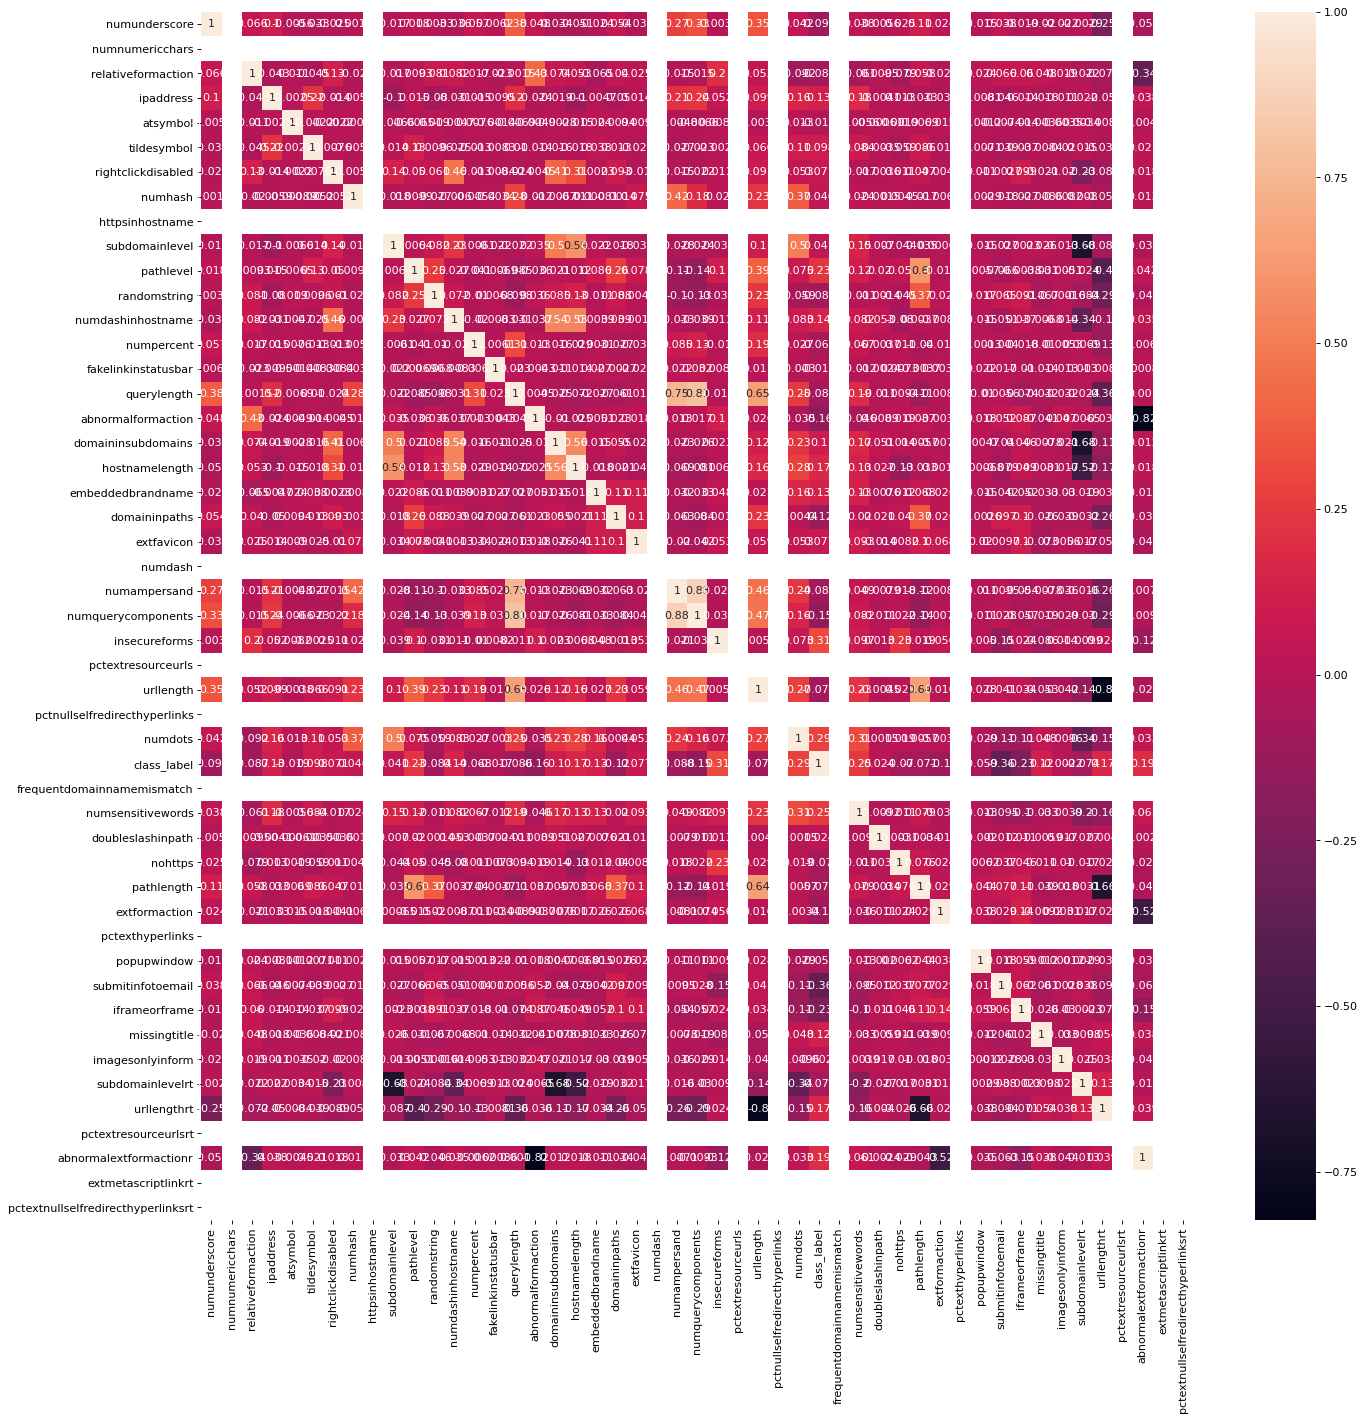

In [8]:
import seaborn as sn
figure(figsize=(20, 20), dpi=80)

train_df.corr(method='pearson', min_periods=1)
corrMatrix = train_df.corr()
sn.heatmap(corrMatrix, annot=True)
plt.show()

In [9]:
np.sum(corrMatrix[(corrMatrix>0.8)&(corrMatrix<1)])

numunderscore                         0.000000
numnumericchars                       0.000000
relativeformaction                    0.000000
ipaddress                             0.000000
atsymbol                              0.000000
tildesymbol                           0.000000
rightclickdisabled                    0.000000
numhash                               0.000000
httpsinhostname                       0.000000
subdomainlevel                        0.000000
pathlevel                             0.000000
randomstring                          0.000000
numdashinhostname                     0.000000
numpercent                            0.000000
fakelinkinstatusbar                   0.000000
querylength                           0.807571
abnormalformaction                    0.000000
domaininsubdomains                    0.000000
hostnamelength                        0.000000
embeddedbrandname                     0.000000
domaininpaths                         0.000000
extfavicon   

In [10]:
#remove highly correlated features
train_df = train_df.drop(["numquerycomponents"], axis=1)


In [11]:
colnames = train_df.columns.drop("class_label")

test_df = test_df.rename(str.lower, axis='columns')
test_df = test_df[colnames]
#test_df = test_df.drop(["numquerycomponents"], axis=1)


In [12]:
train_df.shape

(7991, 48)

In [13]:
#remove non important features

#train_df = train_df.drop(non_important_features, axis=1)
#test_df = test_df.drop(non_important_features, axis=1)


# Model Training

This assumes we have a variable `df_train_ready` with the training data.
Assumptions:
* Dataframe is sorted by `timestamp` ascending
* The `id` of the trade is the `index`
* We don't have anything other than numerical and categorical columns in the dataset

## Retrieving values for model training

In [14]:
# Getting our df into values
X = train_df.drop(columns=["class_label"]).values
y = train_df.class_label.values

X_test = test_df.values
#test_ids = test_df.id.values

In [15]:
# Using a split of 75-25 - we can try tunning these values later
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.25, shuffle=True)
#X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=2, shuffle=True)

In [16]:
np.sum(y_val==0)

1016

## Model Training

### Functions for the Model Training

In [17]:
def perform_grid_search_and_return_best_model(grid_search_input):
    grid_search_input.fit(X_train, y_train)
    print("Best Parameters:")
    display(grid_search_input.best_estimator_.get_params())
    return grid_search_input.best_estimator_

In [18]:
# Plotting the AUC Score
def plot_roc_curve(roc_auc, fpr, tpr):
    # Function to plot ROC Curve
    # Inputs: 
    #     roc_auc - AU ROC value (float)
    #     fpr - false positive rate (output of roc_curve()) array
    #     tpr - true positive rate (output of roc_curve()) array
    plt.figure(figsize=(8, 6))
    lw = 2
    plt.plot(fpr, tpr, color='orange', lw=lw, label='ROC curve (AUROC = %0.2f)' % roc_auc)
    plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--', label='random')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.grid()
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

In [19]:
# Getting the AUC and Plotting it against test split for a given model
def auc_against_validation_set(best_model):
    # Get predictions for our test set
    y_val_pred = best_model.predict(X_val)
    
    # AUC Score
    roc_auc = roc_auc_score(y_true=y_val, y_score=y_val_pred)
    
    fpr, tpr, thresholds = roc_curve(y_true=y_val, y_score=y_val_pred)
    plot_roc_curve(roc_auc=roc_auc, fpr=fpr, tpr=tpr)
    
    return f1_score(y_true=y_val, y_pred=y_val_pred), np.sum(y_val_pred), len(y_val_pred)

In [20]:
# Get the results for the Test Set and write to the filesystem

def test_set_results(model_input, model_name):
    file_to_save = "predictions_to_submit/{0}_{1}.csv".format(model_name, time.strftime("%Y-%m-%d %H:%M"))
    y_test = model_input.predict(X_test)
    results = pd.DataFrame(data=y_test, index = test_df.index, columns=["CLASS_LABEL"])
    results.index.rename("id", inplace=True)
    results.to_csv(file_to_save)
    return results


### Random Forest Classifier

In [21]:

# For the Hyperparameter Tunning, lets define here our Grid
hyper_parameters_grid_rf = {
    #'max_depth': [2, 6, 13, 20, 25],
    #'n_estimators': [100, 200, 300, 500]
    "max_depth" : [25],
    'n_estimators': [500]
    
    #"max_depth" : [20],
    #'n_estimators': [300]
}



grid_search_rf = GridSearchCV(
    RandomForestClassifier(),
    hyper_parameters_grid_rf,
    cv=3,
    scoring="f1", 
)

best_rf_model = perform_grid_search_and_return_best_model(grid_search_rf)

Best Parameters:


{'bootstrap': True,
 'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 25,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 500,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 0,
 'warm_start': False}

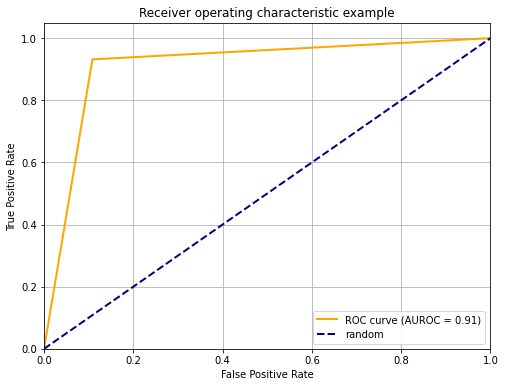

(0.9118086696562032, 1025.0, 1998)

In [28]:
auc_against_validation_set(best_rf_model)


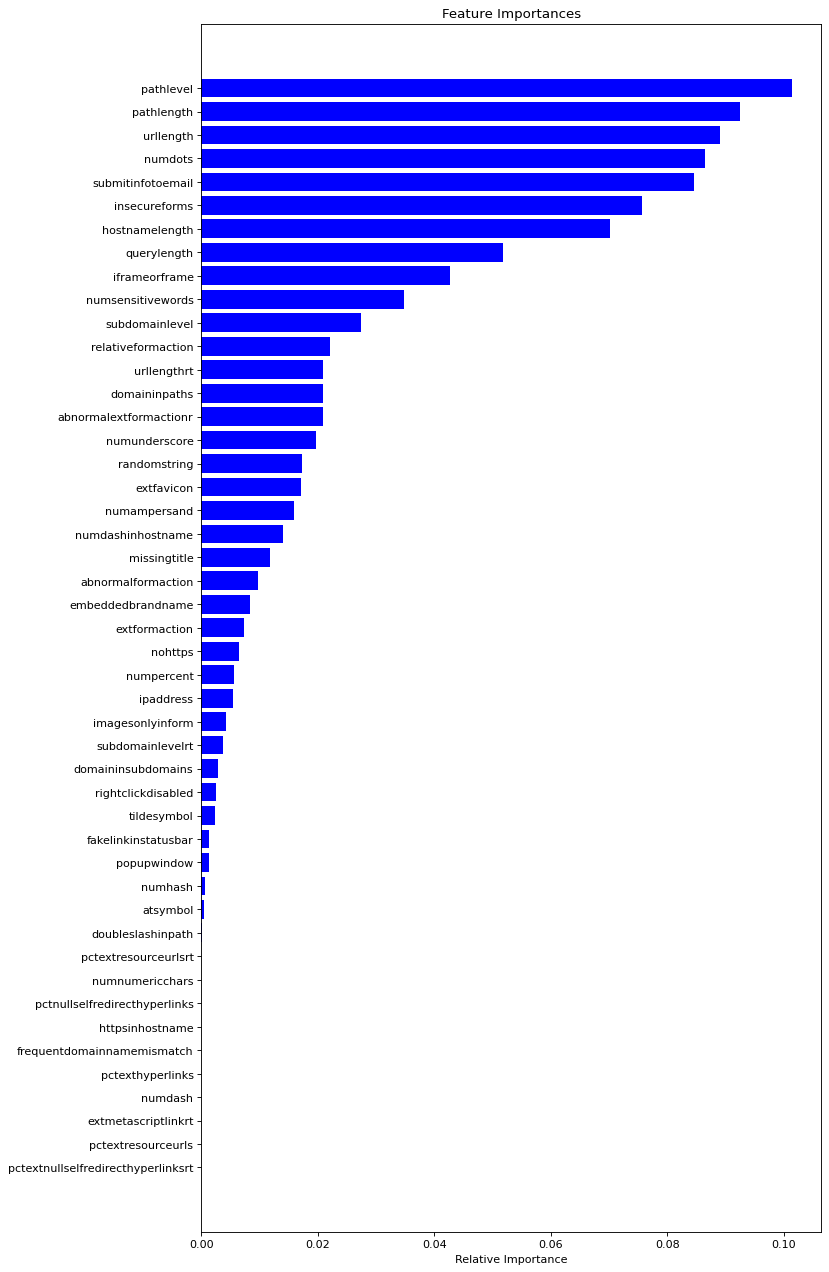

In [23]:

rf = best_rf_model
#rf = pipeline.steps[2][1]
feature_importances = rf.feature_importances_
#features = X_train.columns
features = train_df.drop(columns=["class_label"]).columns

figure(figsize=(10, 20), dpi=80)
indices = np.argsort(feature_importances)
plt.title('Feature Importances')
plt.barh(range(len(indices)), feature_importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()



In [24]:
non_important_features = [features[i] for i in indices][0:12]

In [25]:
non_important_features

['pctextnullselfredirecthyperlinksrt',
 'pctextresourceurls',
 'extmetascriptlinkrt',
 'numdash',
 'pctexthyperlinks',
 'frequentdomainnamemismatch',
 'httpsinhostname',
 'pctnullselfredirecthyperlinks',
 'numnumericchars',
 'pctextresourceurlsrt',
 'doubleslashinpath',
 'atsymbol']

In [26]:
r = test_set_results(best_rf_model, "random_forest")

In [27]:
np.sum(r.CLASS_LABEL==1)

851